In [ ]:
##pip install pandas numpy matplotlib scikit-learn

In [11]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [12]:
# Reading data from a CSV file
df = pd.read_csv('Florida_ct.csv')

In [13]:
# Load the shapefile
florida_shapefile = gpd.read_file('tl_2020_12_tract/tl_2020_12_tract.shp')

In [14]:
# Assuming 'feature1' and 'feature2' are the columns for clustering
# Adjust column names based on your dataset
X = df[['travel_driving_ratio']]

In [15]:
# Ensure the data type matches for merging
florida_shapefile['GEOID'] = florida_shapefile['GEOID'].astype('int64')
df['full_ct_fips'] = df['full_ct_fips'].astype('int64')

In [16]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn

In [28]:
# Apply AgglomerativeClustering for hierarchical clustering on the scaled features
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  # Parameters can be adjusted as needed
hclust_labels = hclust.fit_predict(X_scaled)

/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
# Add the hierarchical clustering results to the original DataFrame
df['hclust_cluster'] = hclust_labels

In [30]:
# Merge the hierarchical clustering results into the GeoDataFrame for plotting
df_shp_hclust = florida_shapefile.merge(df[['full_ct_fips', 'hclust_cluster']],
                                        how='left',
                                        left_on='GEOID',
                                        right_on='full_ct_fips')


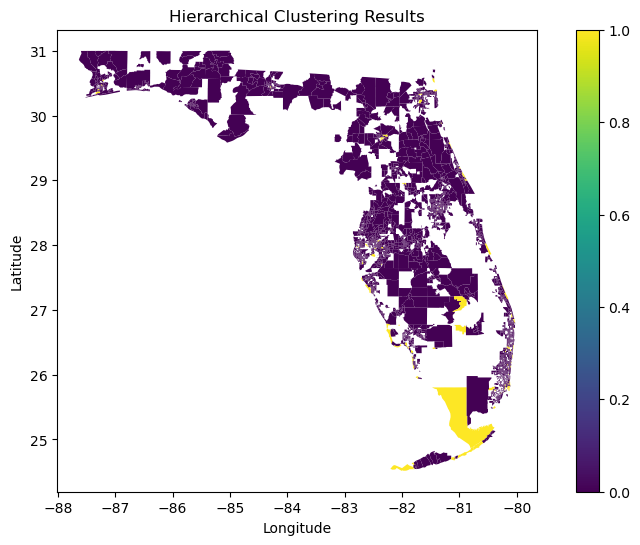

In [31]:
# Plot the map with hierarchical clustering results
fig, ax = plt.subplots(figsize=(10, 6))
df_shp_hclust.plot(ax=ax, column='hclust_cluster', cmap='viridis', legend=True, edgecolor='none')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()